# K-Means Clustering with scikit-learn

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# create dataset
# X, y = make_blobs(
#    n_samples=150, n_features=2,
#    centers=3, cluster_std=0.5,
#    shuffle=True, random_state=0
# )

boston = load_boston()
X = boston.data
y = boston.target
boston.feature_names

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)



In [76]:
#X[:,0]
# type(X)
# type(y)
X_train

array([[1.50234e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.49480e+02, 2.49100e+01],
       [6.27390e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.95620e+02, 8.47000e+00],
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [35]:
def make_data(n, seed):
    np.random.seed(seed)
    
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

train = make_data(10, 42)
test = make_data(10, 27)

type(train)

pandas.core.frame.DataFrame

In [38]:
train.head(10).sort_index()

,x,y
3,90.460597,0.543360
5,55.317261,1.218856
6,91.584256,0.993584
8,50.610512,1.045988
10,149.312975,4.199147
12,121.350564,4.493251
20,194.769332,1.662042
21,183.427366,1.307459
27,201.142445,1.345394
29,144.739197,1.987773


In [88]:
X_train

array([[1.50234e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.49480e+02, 2.49100e+01],
       [6.27390e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.95620e+02, 8.47000e+00],
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [91]:
pd.DataFrame(X_train, columns=boston.feature_names).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
5,0.19186,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
6,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
7,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
8,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45
9,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78


In [102]:
X_train[:, :]

array([[1.50234e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.49480e+02, 2.49100e+01],
       [6.27390e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.95620e+02, 8.47000e+00],
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

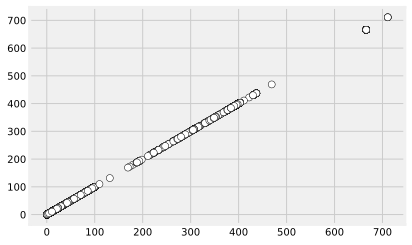

In [104]:
# plot
plt.scatter(
   X_train[:, :], X_train[:, :],
   #train['x'], train['y'],
   c='white', marker='o',
   edgecolor='black', s=50
)
# plt.scatter(
#    X_train[:, 1], X_train[:, 2],
#    #train['x'], train['y'],
#    c='white', marker='o',
#    edgecolor='black', s=50
# )
# plt.scatter(
#    X_train[:, 3], X_train[:, 4],
#    #train['x'], train['y'],
#    c='white', marker='o',
#    edgecolor='black', s=50
# )
# plt.scatter(
#    X_train[:, 4], X_train[:, 5],
#    #train['x'], train['y'],
#    c='white', marker='o',
#    edgecolor='black', s=50
# )
# plt.scatter(
#    X_train[:, 5], X_train[:, 6],
#    #train['x'], train['y'],
#    c='white', marker='o',
#    edgecolor='black', s=50
# )
# plt.scatter(
#    X_train[:, 6], X_train[:, 6],
#    #train['x'], train['y'],
#    c='white', marker='o',
#    edgecolor='black', s=50
# )
# plt.scatter(
#    X_train[:, 6], X_train[:, 7],
#    #train['x'], train['y'],
#    c='white', marker='o',
#    edgecolor='black', s=50
#)
plt.show()

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)

In [74]:
train_scaled = pd.DataFrame(train_scaled, columns=[boston.feature_names])

In [75]:
train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


## K-means clustering using

In [80]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(train_scaled)

In [83]:
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

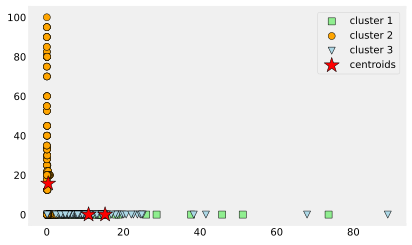

In [81]:
plt.scatter(
    train_scaled[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()